# STAT 201 Group Project: Assessing the Effectiveness of VPD Bike Theft Prevention Programs

Group32: Angela Felicia, Christin Wang, Linda Chu, Yifan Hao

### Background Information

Bike theft is a major issue in Vancouver. According to the Vancouver Police Department (VPD), over 2,000 bikes are reported stolen in Vancouver every year (Vancouver Police Department, n.d.). To combat this issue, the VPD partnered with Project 529 in 2015 to introduce a theft report and recovery system for bikes. Registered bikes display a Project 529 decal (i.e. “shield”) to deter thieves and make tracking stolen bikes easier.

According to both the VPD and McIntyre (2023), bike theft in Vancouver dropped following the introduction of Project 529, and other studies have shown that the inexpensive decal and Project 529 signage alone was effective in deterring theft (Nettle, Nott, & Bateson, 2012).

### Our Question
We want to investigate whether the VPD's claims are supported by statistical inference. To accomplish this, we will compare the proportion of bike theft out of all reported crime in Vancouver in 2012 (a year before Project 529 was created) to the proportion of bike theft in 2022 (the most recent year that has concluded). We will also identify a confidence interval to state how confident we are in our findings. 

For our project, we will focus on Downtown Vancouver as bike theft happens predominantly around transport hubs or places of employment which are common in the area, and the crime rate is relatively higher compared to other neighbourhoods (Malleson, Steenbeek, & Andresen, 2019). 
As such, impact from initiatives such as Project 529 would be more evident, making it a good area 
to evaluate the program’s effectiveness. 

The dataset we will use is the VPD Crime dataset from the PRIME BC Police Records Management System (RMS) which contains information about the date/time, location, and type of crime reported in neighbourhoods in Vancouver from 2003 to 2023.


## Preliminary Results: Loading the dataset 


In [1]:
library(dplyr)
library(ggplot2)
library(readr)
library(tidyr)


载入程辑包：'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [2]:
cbd_2012 <- read_csv("https://drive.google.com/u/0/uc?id=1hYkqOrxvwQ7rXIw8jGVoDlUwL0a5Vn9b&export=download")
cbd_2022 <- read_csv("https://drive.google.com/u/0/uc?id=1rDToNyTlyzyVwrLMV4tamVZOdwQBVXRe&export=download")

head(cbd_2012)
head(cbd_2022)

`curl` package not installed, falling back to using `url()`
Rows: 8821 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): TYPE, HUNDRED_BLOCK, NEIGHBOURHOOD
dbl (7): YEAR, MONTH, DAY, HOUR, MINUTE, X, Y

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
`curl` package not installed, falling back to using `url()`
Rows: 10614 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): TYPE, HUNDRED_BLOCK, NEIGHBOURHOOD
dbl (7): YEAR, MONTH, DAY, HOUR, MINUTE, X, Y

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
Break and Enter Commercial,2012,11,26,9,38,10XX BEACH AVE,Central Business District,490268.4,5458143
Break and Enter Commercial,2012,10,11,13,0,10XX CAMBIE ST,Central Business District,491327.6,5458026
Break and Enter Commercial,2012,1,8,22,1,10XX CANADA PL,Central Business District,491519.5,5459521
Break and Enter Commercial,2012,10,27,21,35,10XX CANADA PL,Central Business District,491586.3,5459502
Break and Enter Commercial,2012,12,13,5,0,10XX HAMILTON ST,Central Business District,491211.0,5458148
Break and Enter Commercial,2012,12,15,22,0,10XX HAMILTON ST,Central Business District,491261.0,5458199


TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
Break and Enter Commercial,2022,2,13,6,22,10XX CANADA PL,Central Business District,491493.3,5459542
Break and Enter Commercial,2022,7,16,9,10,10XX CANADA PL,Central Business District,491493.3,5459542
Break and Enter Commercial,2022,10,2,6,29,10XX CANADA PL,Central Business District,491493.3,5459542
Break and Enter Commercial,2022,1,7,6,2,10XX CANADA PL,Central Business District,491493.4,5459542
Break and Enter Commercial,2022,2,26,18,16,10XX DUNSMUIR ST,Central Business District,491237.8,5459259
Break and Enter Commercial,2022,1,21,3,30,10XX DUNSMUIR ST,Central Business District,491238.7,5459259


## Tidying the data
We will select our variable of interest (TYPE) and remove the columns we don't need.

In [3]:
cbd_2012 <- cbd_2012 %>%
    select(TYPE)

cbd_2022 <- cbd_2022 %>%
    select(TYPE)

head(cbd_2012)
head(cbd_2022)

TYPE
<chr>
Break and Enter Commercial
Break and Enter Commercial
Break and Enter Commercial
Break and Enter Commercial
Break and Enter Commercial
Break and Enter Commercial


TYPE
<chr>
Break and Enter Commercial
Break and Enter Commercial
Break and Enter Commercial
Break and Enter Commercial
Break and Enter Commercial
Break and Enter Commercial


## Plotting the sample distribution 

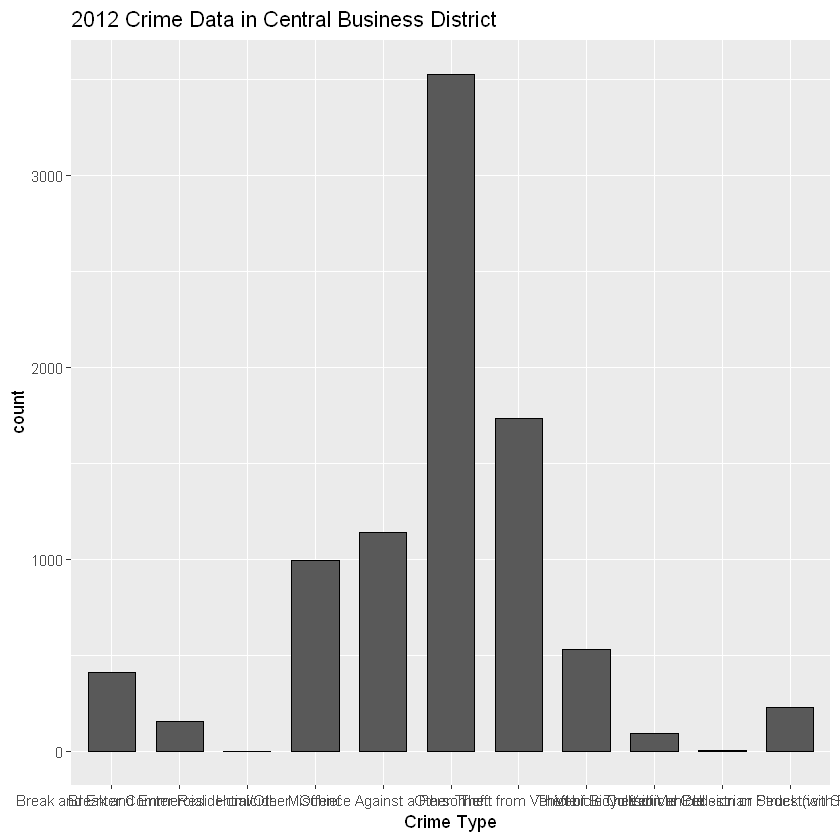

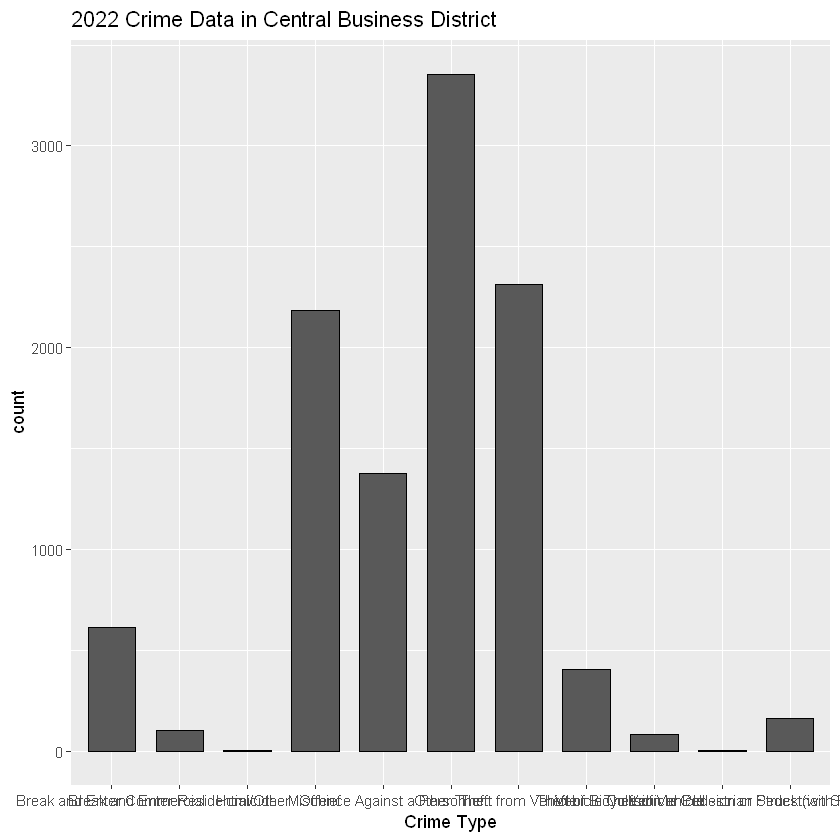

In [8]:
cbd_2012_dist <- cbd_2012 %>%
    ggplot(aes(x= TYPE)) +
    geom_bar(width = 0.7, color="black") +
    labs(x = "Crime Type", title = "2012 Crime Data in Central Business District")

cbd_2022_dist <- cbd_2022 %>%
    ggplot(aes(x= TYPE)) +
    geom_bar(width = 0.7, color="black") +
    labs(x = "Crime Type", title = "2022 Crime Data in Central Business District")

cbd_2012_dist
cbd_2022_dist

In [5]:
bike_theft_2012 <- cbd_2012 %>%
    summarize(bike_theft = sum(TYPE == "Theft of Bicycle"),
              prop_bike_theft_2012 = bike_theft / n()) %>%
    select(prop_bike_theft_2012) 

bike_theft_2022 <- cbd_2022 %>%
    summarize(bike_theft = sum(TYPE == "Theft of Bicycle"),
              prop_bike_theft_2022 = bike_theft / n()) %>%
    select(prop_bike_theft_2022) 

bike_theft_summary <- tibble(bike_theft_2012, bike_theft_2022)
bike_theft_summary

prop_bike_theft_2012,prop_bike_theft_2022
<dbl>,<dbl>
0.06019726,0.03806294


## Methods

In this project, we expect to find the effectiveness of the Project 529 program and its impact on bike theft in the Central Business District (downtown). 

### Step 1: Sample distribution
Create histograms to visualize the distribution of crime counts for both 2012 and 2022. This provides an initial overview of the data.

### Step 2: Calculate original sample statistics
Calculate the bike theft proportion from the original 2012, 2022 datasets.

### Step 3: Perform hypothesis test

##### 3.1 Setting Hypotheses:

Let the proportion of bike thefts in 2022 be p1 and 2012 be p2.

- H0 = P1 - P2 = 0

- Ha =  P1 - P2 < 0 (left-tail test)

##### 3.2 Sampling and Permutation:

Set a random seed. Using the "infer" package, create a null distribution by generating 1000 samples through permutation from the original data. Calculate the bike theft proportion for each one. 
Perform a hypothesis test by comparing the observed difference in proportions between 2012 and 2022 (use "diff of props"). 

Calculate the p-value associated with the test.

##### 3.4 Visualization:

Create a visual representation of the null distribution and shade the left side corresponding to the p-value. Overlay a normal distribution curve on the null distribution to illustrate the central limit theorem (CLT).

### Step 4: Calculate confidence interval

##### 4.1 Calculate mu and sigma:

Compute the standard error (SE)for the distribution using the formula , and find the mean of the statistics.

$SE = √ [(P1 * (1 - P1) / n1) + (P2 * (1 - P2) / n2)]$

##### 4.2 Calculate Confidence Interval:

Use the qnorm() function to find the confidence intervals that we desire.

### Step 5: Interpret results
Set a significance level to determine the outcoming of the research. Use different significant levels and compare the results. 

If the p-value is less than or equal to the significance level, reject H0 (potential Type I error). This would suggest that there is a significant difference in the proportions of bike thefts in the two years, which means that Project 529 is efficient in reducing bike theft in the Central Business District.

If the p-value is greater than the significance level, do not reject H0 (potential Type II error). This indicates that there is not enough evidence to conclude that the proportions are different, and that Project 529 is not efficient in reducing bike theft in the Central Business District.


## Discussion

### What impact could such findings have?

Based on our findings, we would know whether the project was effective in reducing bike theft or not. If the program is found to be effective, it may justify the allocation of current and potentially additional resources and funding towards the program, as well as towards establishing similar programs in other neighbourhoods where bike theft is prominent. If the program is found to have no significant impact, the findings may indicate that a better strategy can be implemented to reduce bike theft. Besides, policies could be adjusted by the government to combat bike theft. Moreover, it could raise public awareness towards bike theft. This would call for higher participation in the program, which would decrease bike theft further. The decrease in crime rates would enhance the overall quality of life for residents, and make our society more civilised.

### What future questions could this lead to?
Since we only looked into the Central Business District, the final inference results wouldn't be powerful enough. Therefore, we could further examine if the project worked out in other regions in Vancouver? 
Further research could examine the cost-effectiveness of Project 529. Is the reduction in bike theft worth the investment in the program? Are there more cost-efficient alternatives? If the project is successful, how are some ways to advocate it to other cities and neighbourhoods?
Could we conduct different hypothesis tests to infer other types of crimes in the criminal data and improve policing methods? Besides, if Project 529 is found to be successful, it may be useful to evaluate other crime prevention programs.


## References 

Dataset source: https://geodash.vpd.ca/opendata 

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6594600/ This article investigates the spatial resolution for crime patterns using the same database. One of the four crimes they investigated was theft of bikes (TOB) because it is voluminous (at least 2000 events per year, not sure if they only meant Vancouver). One thing they remarked on was that bike theft happens mostly around transport hubs or places of employment where they’re more available and accessible. Also, the density of crime happened more often in Downtown Vancouver according to their plot using 2015-2016 data. (So, Hastings-Sunrise has bike theft, but not as much as Downtown)

Ballard, J. (2021, February 4). Vancouver still has the most bike thefts per capita among major Canadian cities despite efforts. CBC News. https://www.cbc.ca/news/canada/british-columbia/vancouver-still-has-the-most-bike-thefts-per-capita-among-major-canadian-cities-despite-efforts-1.5898575

Malleson N, Steenbeek W, Andresen MA. Identifying the appropriate spatial resolution for the analysis of crime patterns. PLoS One. 2019 Jun 26;14(6):e0218324. doi: 10.1371/journal.pone.0218324. PMID: 31242224; PMCID: PMC6594600.

McIntyre, G. (2023, June 9). The state of bike thefts in Vancouver. Vancouver Sun. https://vancouversun.com/news/local-news/the-state-of-bike-thefts-in-vancouver

Nettle D, Nott K, Bateson M. 'Cycle thieves, we are watching you': impact of a simple signage intervention against bicycle theft. PLoS One. 2012;7(12):e51738. doi: 10.1371/journal.pone.0051738. Epub 2012 Dec 12. PMID: 23251615; PMCID: PMC3520908.

Vancouver Police Department. (n.d.). Bike theft protection. https://vpd.ca/crime-prevention-safety/bike-theft-protection/
